## 1. import necessary libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## 2. Load data

In [8]:
# load data
df = pd.read_csv('../Resources/processed_features_job_satisfaction.csv')


In [22]:
df.dtypes

JobSatisfaction      object
Workload_Binned       int64
SleepHours_Binned     int64
Age_Binned           object
Stress_Binned         int64
Experience_Binned    object
JobLevel             object
Gender               object
MaritalStatus        object
Dept                 object
EmpType              object
haveOT_Binned        object
dtype: object

## 3. Initialize random forest model for Regression

In [5]:
# Define all features and target
features = ["Workload_Binned", "Stress_Binned", "SleepHours_Binned"]

target = "JobSatisfaction"

# Extract X and y
x = df[features]  # Features
y = df[target]    # Target

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


ValueError: could not convert string to float: 'Dissatisfied'

## first output
### MSE = 1.786 indicates this model has poor peformance.
### R-squared values = -0.122 means this model performs worse than a simple horizontal line.

In [28]:
print(f"features shape: {x.shape}")
print(f"target shape: {y.shape}")

features shape: (3007, 3)
target shape: (3007,)


## 4. Hyperparameter tuning


In [6]:
# Apply Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter space 
hyperparameters = {
    'n_estimators': randint(100, 500),               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                 # Maximum depth of each tree
    'min_samples_split': randint(2, 11),             # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 5),               # Minimum samples required at a leaf node
    'max_features': ['auto']                # Number of features to consider when looking for the best split
}

# Set up the RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Evaluate the model with best hyperparameters
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 388, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
ValueError: could not convert string to float: 'Neutral'

--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 388, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
ValueError: could not convert string to float: 'Dissatisfied'



## Second output
### Best Hyperparameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

### MSE =1.538 
### -> that it minimuze the error but still not good enough.

### R-squared: 0.033 
### -> means only 3.3% of hte variance in JobSatisfaction is explained by our features. 

## Conclusion
### possible causes:  less features to predict JobSatisfaction, or the model is not suitable for this dataset.

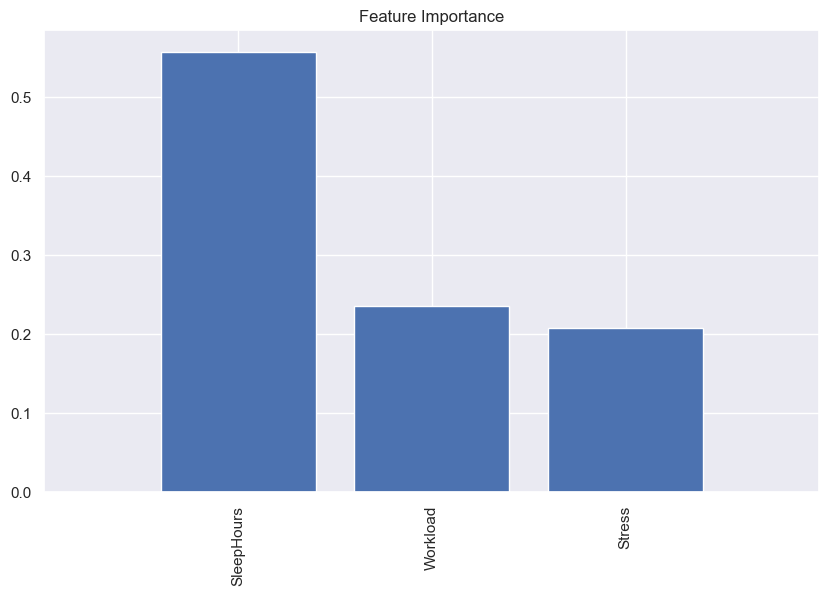

In [30]:

import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf_regressor.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), [x_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()


## Random Forest For Classification

C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.4318936877076412
Classification Report:
                    precision    recall  f1-score   support

     Dissatisfied       0.00      0.00      0.00        60
          Neutral       0.24      0.19      0.21       100
        Satisfied       0.47      0.86      0.61       256
   Very Satisfied       0.37      0.07      0.11       106
Very dissatisfied       0.38      0.19      0.25        80

         accuracy                           0.43       602
        macro avg       0.29      0.26      0.24       602
     weighted avg       0.36      0.43      0.35       602

Confusion Matrix:
 [[  0   7  50   2   1]
 [  0  19  71   0  10]
 [  0  21 219   7   9]
 [  0  10  85   7   4]
 [  1  21  40   3  15]]
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 297}
Accuracy: 0.4435215946843854
Classification Report:
                    precision    recall  f1-score   support

     Dissatisfied       0.00      0.00      0.00        60
          Neutral       0.21      0.04      0.07       100
        Satisfied       0.45      0.95      0.61       256
   Very Satisfied       0.62      0.05      0.09       106
Very dissatisfied       0.40      0.20      0.27        80

         accuracy                           0.44       602
        macro avg       0.34      0.25      0.21       602
     weighted avg       0.39      0.44      0.32       602

Confusion Matrix:
 [[  0   1  58   0   1]
 [  0   4  84   0  12]
 [  0   3 242   3   8]
 [  0   2  96   5   3]
 [  0   9  55   0  16]]


C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

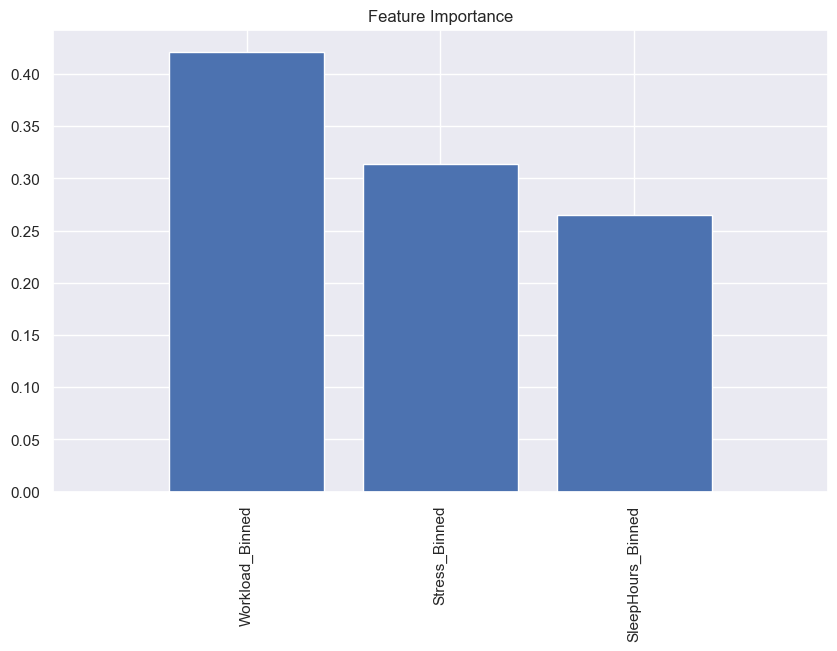

In [4]:

# Define all features and target
features = ["Workload_Binned", "Stress_Binned", "SleepHours_Binned"]

target = "JobSatisfaction"  # Make sure that 'JobSatisfaction' is a categorical variable for classification

# Extract X and y
x = df[features]  # Features
y = df[target]    # Target

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (instead of Regressor)
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=2, min_samples_leaf=1, max_features='auto')

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Apply Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Initialize the RandomForestClassifier
rf = RandomForestClassifier( n_estimators=500, max_leaf_nodes=16, max_features='auto', random_state=42, n_jobs=-1)

# Define the hyperparameter space
hyperparameters = {
    'n_estimators': randint(100, 500),               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                 # Maximum depth of each tree
    'min_samples_split': randint(2, 11),             # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 5),               # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt'],                # Number of features to consider when looking for the best split
}

# Set up the RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Evaluate the model with best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize feature importance
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = best_rf.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), [x_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()



In [7]:
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure the 'Resource' folder exists
os.makedirs("Resource", exist_ok=True)

# Get the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Actual_{i}" for i in range(1, len(conf_matrix) + 1)],
                              columns=[f"Predicted_{i}" for i in range(1, len(conf_matrix) + 1)])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a DataFrame for accuracy
accuracy_df = pd.DataFrame({"Metric": ["Accuracy"], "Value": [accuracy]})

# Concatenate all DataFrames into one
final_df = pd.concat([report_df, conf_matrix_df, accuracy_df], axis=0, ignore_index=False)

# Save the final DataFrame to a CSV file in the "Resource" folder
final_df.to_csv("Resources/classification_results.csv", index=True)

print("All results saved to a single CSV file in the 'Resource' folder.")


C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mnmhy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

All results saved to a single CSV file in the 'Resource' folder.


### Memo
## dataset : accuracy
## cleaned_employees.csv : 0.33 - 0.41 after tuning
## employee_survey.csv: 0.34 - 0.40 after tuning
## processed_features_job_satisfaction.csv: 0.4318 - 0.44 after tuning

